
# 📘 House Price Prediction Using Multiple Regression Models

Predicting **house sale prices** is a common machine learning problem because prices depend on many factors such as location, number of rooms, property size, and neighborhood characteristics. This project explores different regression models to find which performs best and how to reduce overfitting.

---

## 🏠 **Problem Statement**

The goal is to build machine learning models that can **predict house sale prices** using available housing features. Because the dataset may contain complex and nonlinear patterns, different regression algorithms are tested to compare accuracy and general performance.

---

## 🔧 **Models**


## 🌳 **Non-Linear Models**

### 1. **Decision Tree Regressor**

Splits the data into rules based on feature values.

* Captures nonlinear relationships
* Easy to visualize and interpret
* Prone to **overfitting**

---

### 2. **Random Forest Regressor**

An ensemble of many decision trees.

* Reduces overfitting
* Handles both linear and nonlinear patterns
* More stable and accurate than a single tree

---

### 3. **LightGBM Regressor (Light Gradient Boosting Machine)**

A powerful boosting algorithm that builds trees sequentially.

* Extremely fast with large datasets
* Handles missing values and categorical data well
* Often gives **state-of-the-art performance** for tabular datasets





## Importing Libaries and Loading Train dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/Sabaina-MLOps/ML_Regression/main/train.csv"
df_train = pd.read_csv(url)

# Check the first few rows
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




# 🧹 **Data Preprocessing and Exploratory Data Analysis (EDA)**

Before building predictive models, it is important to understand the structure and quality of the dataset. This step focuses on cleaning the data, exploring patterns, and removing features that do not contribute meaningfully to predicting house sale prices.

---

## 🔍 **1. Checking for Missing Data**

The first step is to identify missing values that may affect model performance.
Typical actions include:

* Counting missing values in each column
* Deciding whether to **fill**, **impute**, or **drop** missing entries
* Ensuring no important feature is lost during cleaning

This step ensures the dataset is consistent and suitable for regression modeling.

---

## 📊 **2. Plotting Histograms**

Histograms help visualize:

* Distribution of each numerical feature
* Skewness in variables like lot size, living area, or sale price
* Whether transformations (e.g., log scaling) might help

Histogram plots allow us to see ranges, outliers, and patterns in the data that influence model training.

---

## 🔗 **3. Correlation Analysis**

Correlation analysis identifies the strength and direction of the relationship between each predictor and the **response variable (Sale Price)**.

Key steps include:

* Computing correlation matrix
* Plotting correlation heatmap
* Highlighting highly correlated features
* Detecting multicollinearity

This helps select features that are most relevant for prediction.

---

## ✂️ **4. Removing Less Useful Variables**

After checking correlations, the next step is removing:

* Variables with **very low correlation** with Sale Price
* Highly redundant predictors (to prevent multicollinearity)
* Features that add noise but not predictive power

Keeping only meaningful features improves model accuracy and reduces overfitting.

---

## ✔️ **Summary of This Step**

* Cleaned dataset by checking and handling missing values
* Visualized distributions using histograms
* Conducted correlation analysis to understand variable relationships
* Removed weak or irrelevant predictors to prepare the dataset for modeling




In [4]:
# copying dataset for preprocessing
df_pre = df_train.copy()

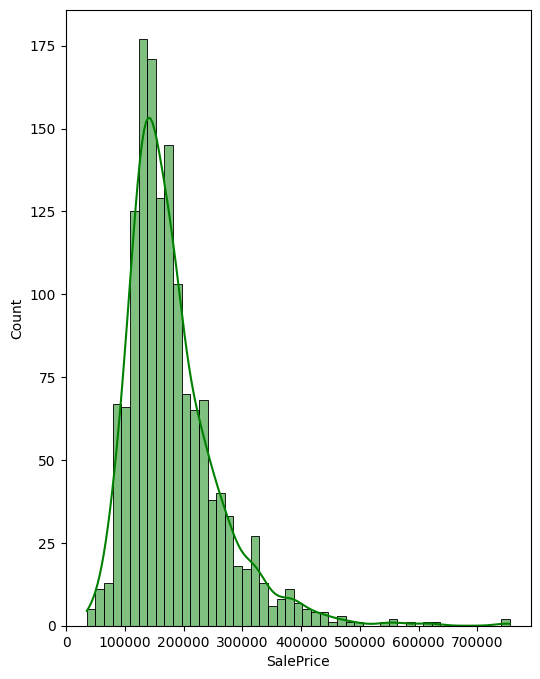

In [5]:
# Checking the distribution of the reponse variable
plt.figure(figsize=(6,8))
sns.histplot(df_pre['SalePrice'], kde = True, color = 'g')
plt.show()

In [6]:
#checking for missing variable in the response variable
df_pre['SalePrice'].isna().sum()

np.int64(0)

In [7]:
# Statistics summary
df_pre.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# GROUPING BOTH NUMERICAL AND CATEGORICAL VARIABLES FOR SEPARATE INSPECTION
num_cols = df_pre.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_pre.select_dtypes(include=['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# CHECKING FOR MISSING VALUES IN NUMERIAL COLUMNS
df_pre[num_cols].isna().sum()

,0
Id,0
MSSubClass,0
LotFrontage,259
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0


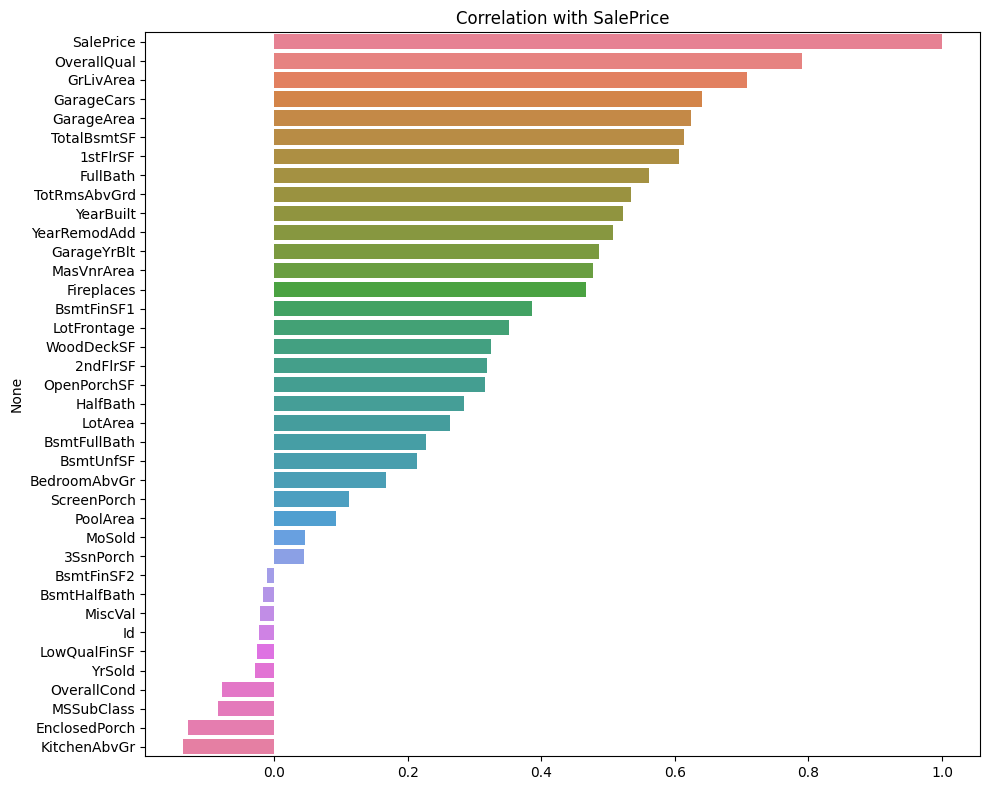

In [10]:
# Checking for correlation between reponse variable and numerical independent variable
correlations = df_pre[num_cols].corrwith(df_pre['SalePrice']).sort_values(ascending = False)

plt.figure(figsize = (10,8))
sns.barplot(x = correlations.values, y = correlations.index, hue = correlations.index)
plt.title('Correlation with SalePrice')
plt.tight_layout()
plt.show()

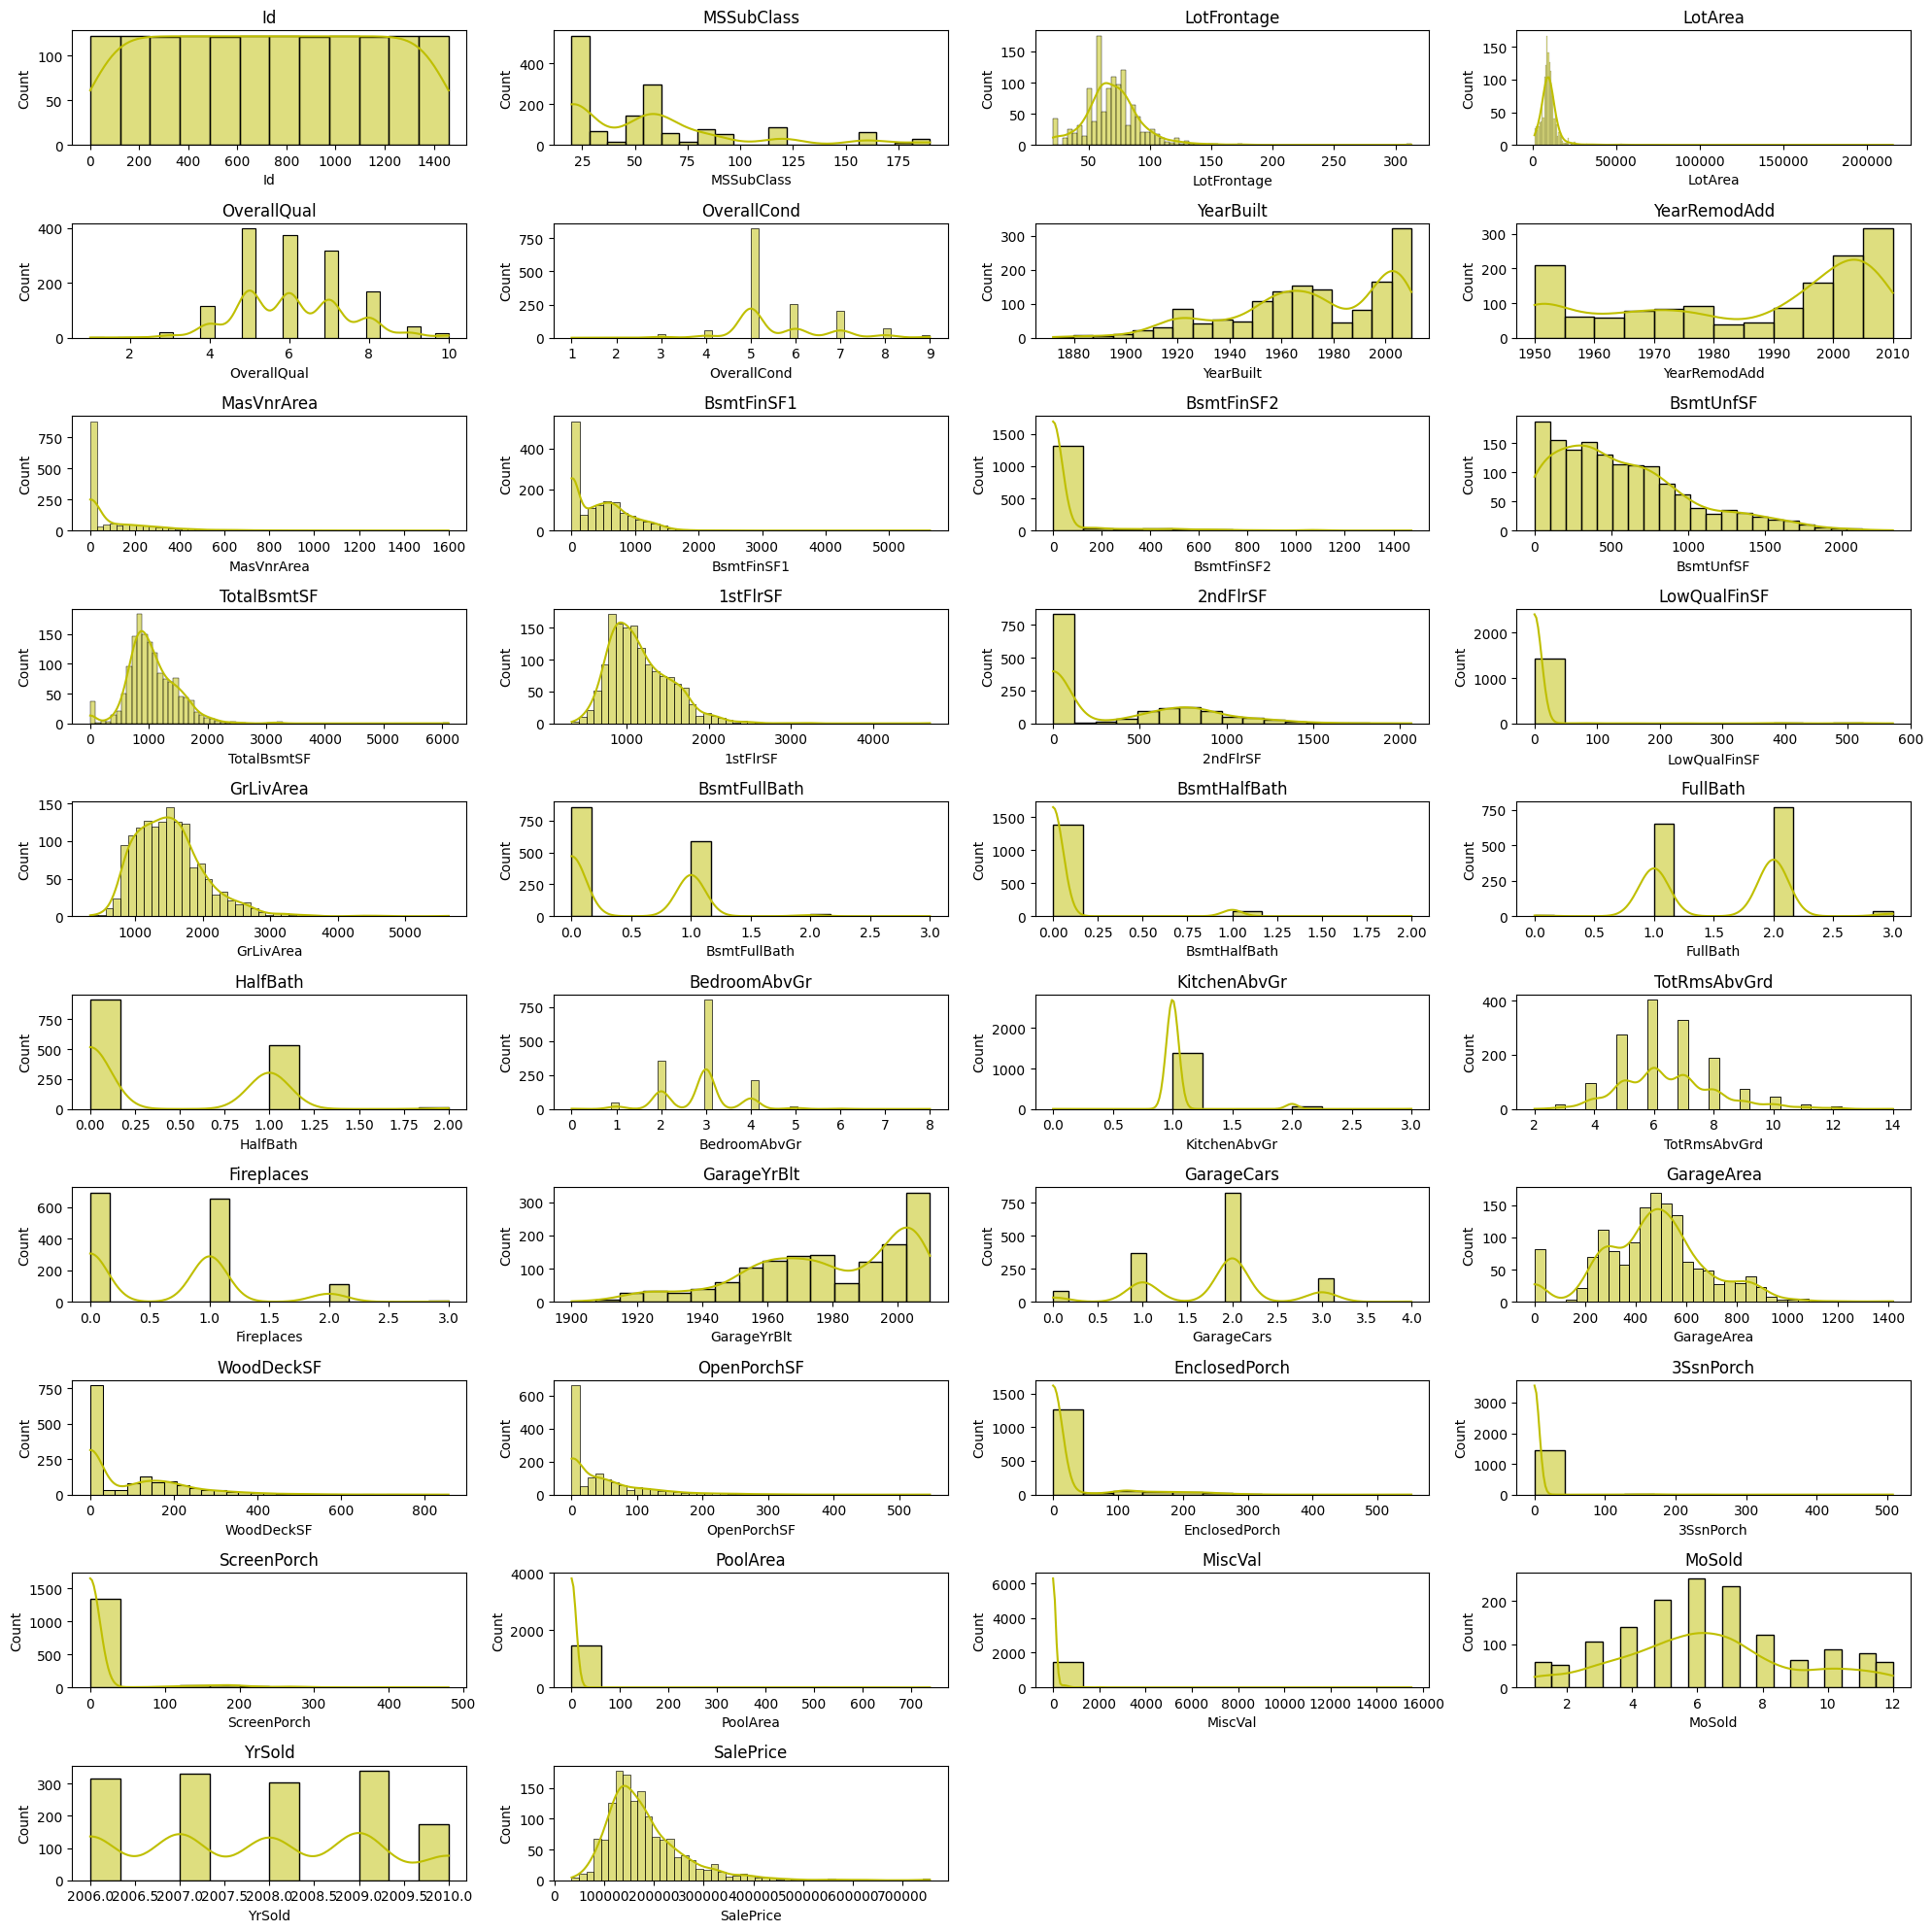

In [11]:
fig, axes = plt.subplots(nrows = 10, ncols = 4, figsize =(20,20) )
axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.histplot(df_pre[col], kde = True, color = 'y', ax = axes[i])
  axes[i].set_title(col)

for j in range(1+i, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

📌 Inspection of Numeric Features

After inspecting the numeric variables in the dataset, we identified two major issues:

1. Missing Values

Some numeric features contain missing values, which can negatively affect model training.
To address this, we need to impute the missing values — typically using the median, since it is robust to outliers.

2. Skewed Distributions

Many numeric features are not normally distributed.
Skewed data can harm linear models and reduce predictive performance.
To reduce skewness and stabilize variance, we will apply a log transformation (or other nonlinear transformations such as Yeo-Johnson).

Required Preprocessing

Because of these issues, numeric features must go through two preprocessing steps:

Median Imputation

Log or Non-linear Transformation (e.g., Yeo-Johnson or log1p)

This ensures cleaner, more stable data for modeling.

In [12]:
cat_cols_train = df_train.select_dtypes(include=['object']).columns

In [13]:
df_train = df_train.drop(columns = cat_cols_train, axis = 1)

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [31]:
# Construct X and y using the identified columns
y = df_train['SalePrice']
X = df_train.drop(columns = ['SalePrice', 'Id'])

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size = 0.2, random_state = 42)


In [33]:
# Redefine num_cols_train and cat_cols_train based on the new X_train
num_cols_train = X_train.select_dtypes(include=['int64', 'float64']).columns


In [34]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)

In [45]:
# Define separate pipelines for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power_transformer', PowerTransformer(method='yeo-johnson'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols_train)
    ]
).set_output(transform="pandas") # Add .set_output(transform="pandas") here


## 🔧 Model Pipelines

Each model is wrapped inside a pipeline with the same preprocessing step (`preprocessor`).
This ensures missing values, scaling, and encoding are applied before training.


 ### 🌳 Decision Tree

```python
DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
```

**Explanation**

* **max_depth**: limits how deep the tree can grow (prevents overfitting)
* **min_samples_split**: minimum samples required to split a node
* **min_samples_leaf**: minimum samples allowed in a leaf
* **random_state**: ensures reproducible results

---

### 🌲 Random Forest

```python
RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    n_jobs=-1,
    random_state=42
)
```

**Explanation**

* **n_estimators**: number of trees in the forest
* **max_depth**: maximum depth of each tree
* **min_samples_split / min_samples_leaf**: control overfitting
* **n_jobs=-1**: uses all CPU cores
* **random_state**: reproducibility

---
 ### ⚡ LightGBM

```python
LGBMRegressor(
    n_estimators=800,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    random_state=42
)
```

**Explanation**

* **n_estimators**: number of boosting rounds
* **learning_rate**: step size for each tree
* **num_leaves**: controls tree complexity
* **subsample / colsample_bytree**: randomness to reduce overfitting
* **min_child_samples**: minimum samples required in a leaf
* **random_state**: reproducibility




In [36]:
dt_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", DecisionTreeRegressor(
       max_depth=5,
       min_samples_split=10,
       min_samples_leaf=5,
       random_state=42
        ))
])

rf_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestRegressor(
         n_estimators=200,
         max_depth=10,
         min_samples_split=5,
         min_samples_leaf=2,
         random_state=42,
         n_jobs=-1,
         ))
])

lgbm_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", LGBMRegressor(
        n_estimators=800,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_samples=20,
        random_state=42
    ))
])

In [37]:
dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
lgbm_pipeline.fit(X_train, y_train)

dt_y_test_prediction = dt_pipeline.predict(X_val)
rf_y_test_prediction = rf_pipeline.predict(X_val)
lgbm_y_test_prediction = lgbm_pipeline.predict(X_val)


/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2912
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 35
[LightGBM] [Info] Start training from score 12.030658


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [39]:
print(f'Decision Tree MSE: {mean_squared_error(y_val, dt_y_test_prediction)}')
print(f'Decision Tree R2: {r2_score(y_val, dt_y_test_prediction)}')
print(f'Decision Tree MAE: {mean_absolute_error(y_val, dt_y_test_prediction)}')

Decision Tree MSE: 0.041524974331556795
Decision Tree R2: 0.777478407646153
Decision Tree MAE: 0.1458827135623604


In [40]:
print(f'Random Forest MSE: {mean_squared_error(y_val, rf_y_test_prediction)}')
print(f'Random Forest R2: {r2_score(y_val, rf_y_test_prediction)}')
print(f'Random Forest MAE: {mean_absolute_error(y_val, rf_y_test_prediction)}')

Random Forest MSE: 0.022275774394323267
Random Forest R2: 0.8806298891466641
Random Forest MAE: 0.09944914038974452


In [41]:
print(f'LGBM MSE: {mean_squared_error(y_val, lgbm_y_test_prediction)}')
print(f'LGBM R2: {r2_score(y_val, lgbm_y_test_prediction)}')
print(f'LGBM MAE: {mean_absolute_error(y_val, lgbm_y_test_prediction)}')

LGBM MSE: 0.021631259083512988
LGBM R2: 0.8840836799211702
LGBM MAE: 0.09836897099417218


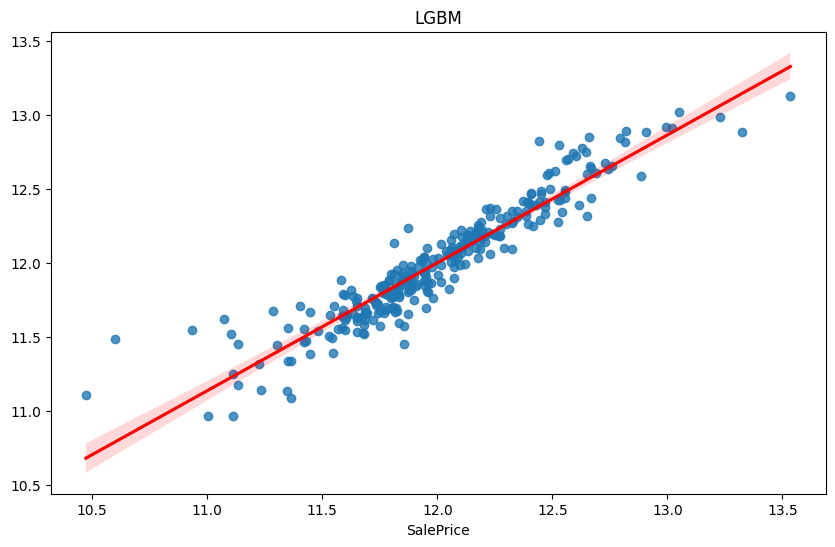

In [42]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_val, y=lgbm_y_test_prediction, line_kws={'color':'red'})
plt.title('LGBM')
plt.show()

In [43]:
url = "https://raw.githubusercontent.com/Sabaina-MLOps/ML_Regression/main/test.csv"
df_test = pd.read_csv(url)

In [48]:
df_test_ids = df_test['Id']

# Drop categorical columns from df_test to match the training features
cat_cols_test = df_test.select_dtypes(include=['object']).columns
df_test_processed = df_test.drop(columns=cat_cols_test, axis=1)

# Ensure df_test_processed has the same columns and order as X_train
# num_cols_train was derived from X_train's numerical columns
df_test_processed = df_test_processed[num_cols_train]

# Make predictions using the best model (LGBM pipeline)
lgbm_predictions = lgbm_pipeline.predict(df_test_processed)

# Inverse transform the predictions since SalePrice was log1p transformed
final_predictions = np.expm1(lgbm_predictions)

# Create a submission DataFrame
submission_df = pd.DataFrame({'Id': df_test_ids, 'SalePrice': final_predictions})

# Display the first few rows of the submission file
print(submission_df.head())

# Save the submission file to CSV (uncomment to save)
submission_df.to_csv('submission.csv', index=False)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


     Id      SalePrice
0  1461  122681.719622
1  1462  157848.370954
2  1463  184508.001183
3  1464  183118.163068
4  1465  185831.807841
